# Neural Networks

# Part-1

### Describe Batch Normalization ?
Batch Normalization is a technique used in deep learning to make the training of neural networks faster and more stable. It works by normalizing the inputs to a layer for each mini-batch, which helps in reducing the internal covariate shift. This phenomenon occurs when the distribution of each layer's inputs changes during training as the distribution of outputs from the previous layer changes, affecting the learning rate of the network.

Here's a brief explanation of how Batch Normalization works:

1. **Normalization**: The input to each layer is normalized by subtracting the batch mean and dividing by the batch standard deviation. This step ensures that the activations of each input variable have a mean of zero and a standard deviation of one.

2. **Rescaling and Offsetting**: After normalization, the normalized values are rescaled and offset using two learnable parameters, gamma and beta. These parameters allow the normalized values to follow the original distribution, maintaining the layer's non-linearity and ensuring that the subsequent layer makes assumptions about the spread and distribution of inputs during the weight update.

For example, consider a neural network with multiple layers. Initially, the inputs (X1, X2, X3, X4) are normalized. As these inputs pass through the layers, each applying its transformation (e.g., a sigmoid function), the outputs change in scale and distribution. This continuous change can lead to a situation where the learning rate of the network decreases significantly, slowing down the training process.

Batch Normalization addresses this issue by normalizing the output of each layer, which helps in stabilizing the learning process. By doing so, it allows the network to learn more effectively and speeds up the training process. This technique also introduces regularization, reducing the generalization error of the model .
In summary, Batch Normalization is a critical technique in deep learning that accelerates the training of neural networks by standardizing the inputs to each layer for each mini-batch, thereby stabilizing learning and reducing the number of epochs required for training.

# Part-2

In [6]:
#installing tensorflow
#pip install tensorflow

In [7]:
#import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import models,datasets,layers,optimizers,regularizers

In [8]:
#loading the dataset
#https://keras.io/api/datasets/fashion_mnist/
(X_train_full,Y_train_full),(X_test,Y_test)=datasets.fashion_mnist.load_data()


In [9]:
#Mapping the lables with its description
label_mapping={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandals',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankel boot'} 

In [10]:
print(X_train_full.shape)
print(Y_train_full.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
#spliting of training data into train and validation set
X_train,X_valid=X_train_full[:50000],X_train_full[50000:]
Y_train,Y_valid=Y_train_full[:50000],Y_train_full[50000:]


In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Ankel boot


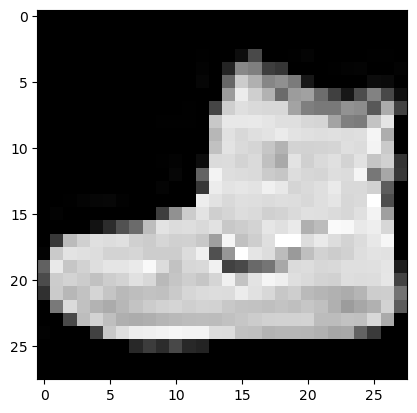

In [13]:
# Displaying the first image along with its description
plt.imshow(X_train[0], cmap="gray")
print(label_mapping[Y_train[0]]);

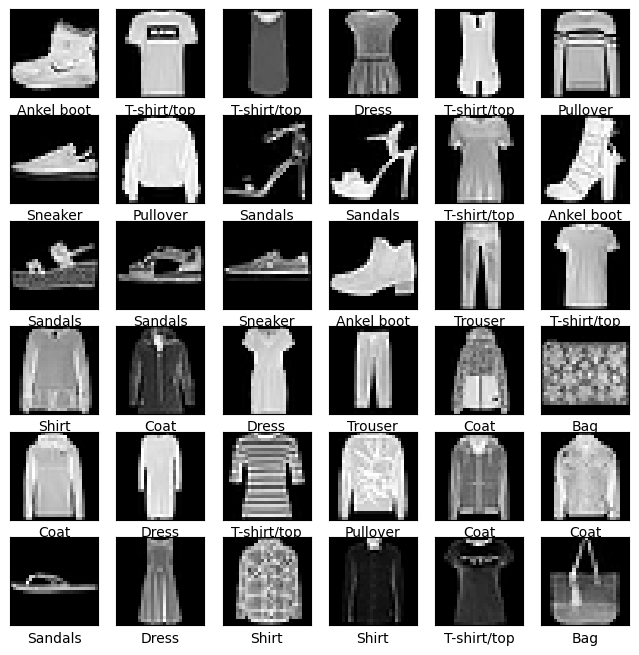

In [14]:
plt.figure(figsize=(8, 8))

for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(Y_train[i])
  plt.xlabel(label_mapping[Y_train[i]])
  plt.xticks([])
  plt.yticks([]);

In [15]:
Y_train

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [16]:
# Scaling the train and test data 
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

### Model 1 : One input flat layer of 784 with adam optimizer

In [17]:
# Use a one flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
ann1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
info = ann1.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.7294 - loss: 0.8092 - val_accuracy: 0.8301 - val_loss: 0.4945
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.8394 - loss: 0.4759 - val_accuracy: 0.8451 - val_loss: 0.4511
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.8447 - loss: 0.4475 - val_accuracy: 0.8400 - val_loss: 0.4567
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.8528 - loss: 0.4275 - val_accuracy: 0.8501 - val_loss: 0.4393
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8570 - loss: 0.4177 - val_accuracy: 0.8493 - val_loss: 0.4340
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.8567 - loss: 0.4077 - val_accuracy: 0.8491 - val_loss: 0.4265
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.8604 - loss: 0.4025 - val_accuracy: 0.8540 - val_loss: 0.4274
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.8638 -

In [20]:
ann1.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8467 - loss: 0.4425


[0.45909667015075684, 0.8403000235557556]

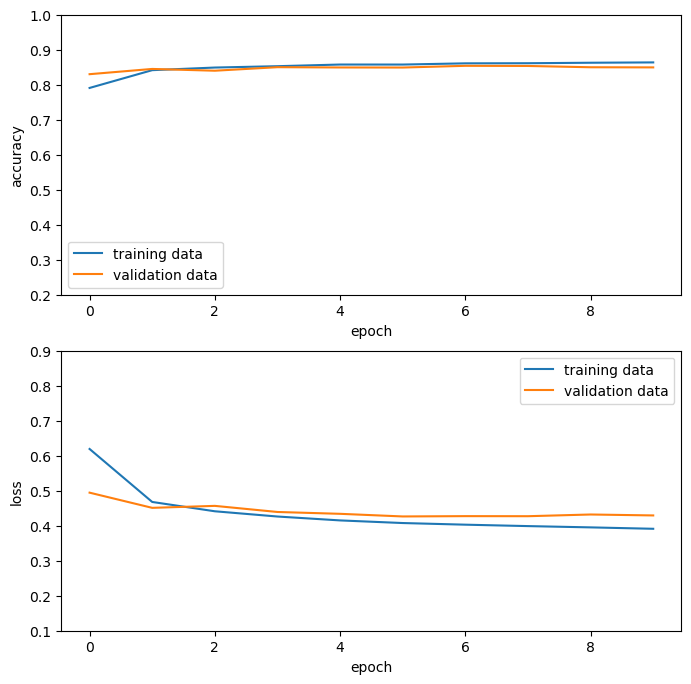

In [21]:
#plotting the graph of accuracy and loss, between trainig and validation

acc=info.history['accuracy']
validate_acc=info.history['val_accuracy']

loss=info.history['loss']
validate_loss=info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(validate_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(validate_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [22]:
#predicting the target variable 
Y_pred = ann1.predict(X_test)
Y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


array([2.9159779e-07, 1.0659257e-08, 5.5233331e-06, 4.4228104e-06,
       3.5967794e-06, 8.3318882e-02, 1.9882360e-05, 4.1324131e-02,
       5.8292956e-03, 8.6949408e-01], dtype=float32)

In [23]:
np.argmax(Y_pred[0])

9

Ankel boot


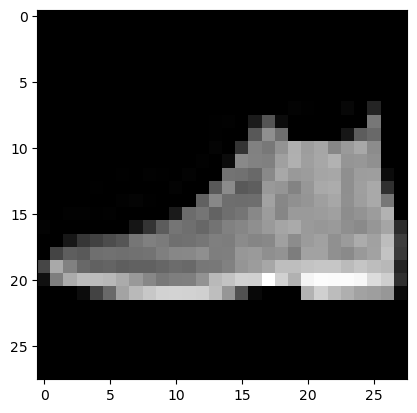

In [24]:
plt.imshow(X_test[0], cmap="gray")
print(label_mapping[Y_test[0]]);

In [25]:
Y_pred_labels_desp = [label_mapping[np.argmax(i)] for i in Y_pred]
Y_pred_labels = [np.argmax(i) for i in Y_pred]
# y_pred_labels

In [26]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(Y_test, Y_pred_labels)
cm

array([[850,   3,  14,  58,  10,   0,  53,   0,  12,   0],
       [  3, 956,   4,  28,   5,   0,   2,   0,   2,   0],
       [ 24,   5, 712,  13, 192,   1,  41,   0,  12,   0],
       [ 30,  13,  12, 874,  44,   0,  22,   0,   5,   0],
       [  0,   1,  70,  35, 850,   0,  36,   0,   8,   0],
       [  0,   0,   0,   1,   0, 924,   0,  44,   3,  28],
       [183,   3, 131,  47, 212,   0, 399,   0,  25,   0],
       [  0,   0,   0,   0,   0,  34,   0, 935,   1,  30],
       [  8,   1,   7,   9,   6,   4,   6,   4, 955,   0],
       [  0,   0,   0,   0,   0,  10,   0,  41,   1, 948]])

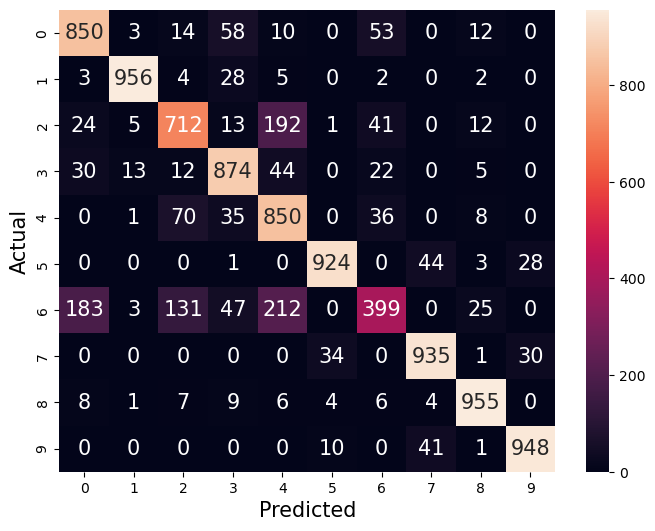

In [27]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [28]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.75      0.71      0.73      1000
           3       0.82      0.87      0.85      1000
           4       0.64      0.85      0.73      1000
           5       0.95      0.92      0.94      1000
           6       0.71      0.40      0.51      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



### Model 2 : One input, one hidden layer with 128 nodes

In [29]:
# Use one hidden layer with 128 nodes

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, Y_train, epochs=5)

Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 773us/step - accuracy: 0.7776 - loss: 0.6423
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.8558 - loss: 0.4044
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.8757 - loss: 0.3450
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.8822 - loss: 0.3178
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8901 - loss: 0.2971


In [30]:
ann2.evaluate(X_valid, Y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8713 - loss: 0.3542


[0.3491305708885193, 0.8718000054359436]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.8947 - loss: 0.2836 - val_accuracy: 0.8770 - val_loss: 0.3386
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9006 - loss: 0.2708 - val_accuracy: 0.8762 - val_loss: 0.3444
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9044 - loss: 0.2545 - val_accuracy: 0.8773 - val_loss: 0.3440
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9095 - loss: 0.2458 - val_accuracy: 0.8793 - val_loss: 0.3346
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.9096 - loss: 0.2400 - val_accuracy: 0.8820 - val_loss: 0.3258
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.9162 - loss: 0.2279 - val_accuracy: 0.8832 - val_loss: 0.3335
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9162 - loss: 0.2216 - val_accuracy: 0.8841 - val_loss: 0.3395
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.9221 -

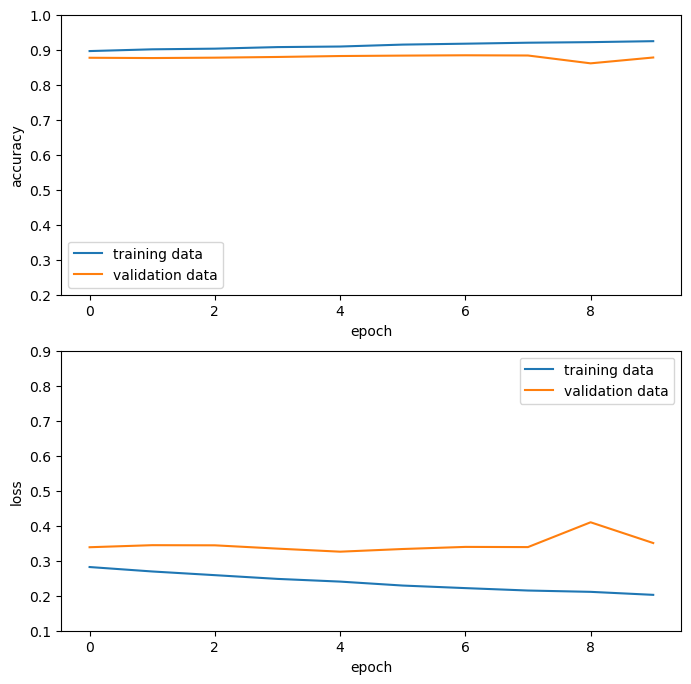

In [31]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann2.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [32]:
ann2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

### Model 3 : One input and one hidden layer with drop out and batch normalization 

In [33]:
# Uses dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.7804 - loss: 0.6404
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.8403 - loss: 0.4514
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.8501 - loss: 0.4194
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.8522 - loss: 0.4031
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.8569 - loss: 0.3920


In [34]:
ann3.evaluate(X_valid, Y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8658 - loss: 0.3790


[0.3746812045574188, 0.8661999702453613]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8633 - loss: 0.3805 - val_accuracy: 0.8645 - val_loss: 0.3674
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.8641 - loss: 0.3691 - val_accuracy: 0.8708 - val_loss: 0.3712
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.8725 - loss: 0.3549 - val_accuracy: 0.8686 - val_loss: 0.3639
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.8739 - loss: 0.3446 - val_accuracy: 0.8728 - val_loss: 0.3520
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8772 - loss: 0.3366 - val_accuracy: 0.8740 - val_loss: 0.3559
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.8757 - loss: 0.3371 - val_accuracy: 0.8797 - val_loss: 0.3368
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.8780 - loss: 0.3319 - val_accuracy: 0.8744 - val_loss: 0.3477
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.8815 - l

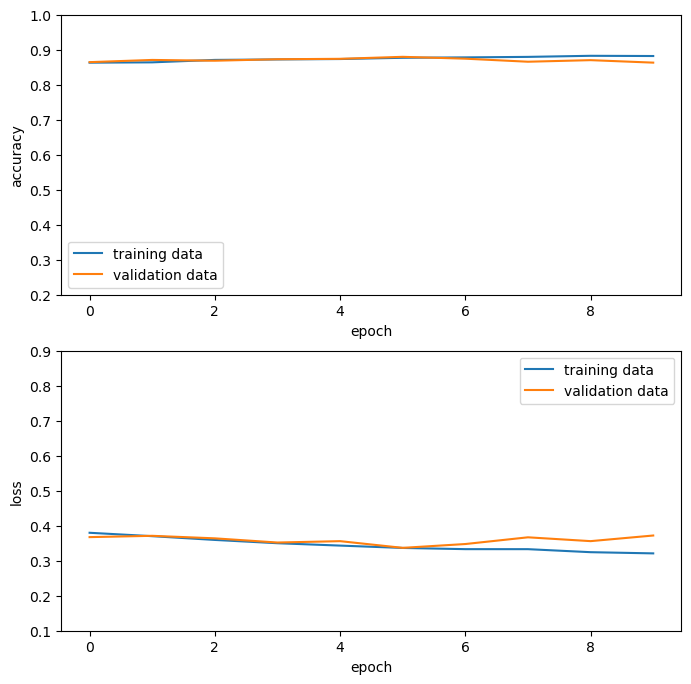

In [35]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann3.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [36]:
ann3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306,336 (1.17 MB)

 Trainable params: 102,026 (398.54 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 204,054 (797.09 KB)

### Model 4 : One input and three hidden layers

In [37]:
#defining model with three hidden layers

ann4 = models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation="relu"),
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])
ann4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann4.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7703 - loss: 0.6318
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss: 0.3830
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.3439
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8804 - loss: 0.3160
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8903 - loss: 0.2944


In [38]:
ann4.evaluate(X_valid, Y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.8820 - loss: 0.3365


[0.33055365085601807, 0.881600022315979]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8943 - loss: 0.2788 - val_accuracy: 0.8760 - val_loss: 0.3371
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9009 - loss: 0.2651 - val_accuracy: 0.8857 - val_loss: 0.3287
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9064 - loss: 0.2519 - val_accuracy: 0.8809 - val_loss: 0.3439
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9086 - loss: 0.2441 - val_accuracy: 0.8906 - val_loss: 0.3217
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9124 - loss: 0.2311 - val_accuracy: 0.8891 - val_loss: 0.3206
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9145 - loss: 0.2226 - val_accuracy: 0.8882 - val_loss: 0.3473
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9178 - loss: 0.2173 - val_accuracy: 0.8841 - val_loss: 0.3614
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9212 - loss: 0.2062 - 

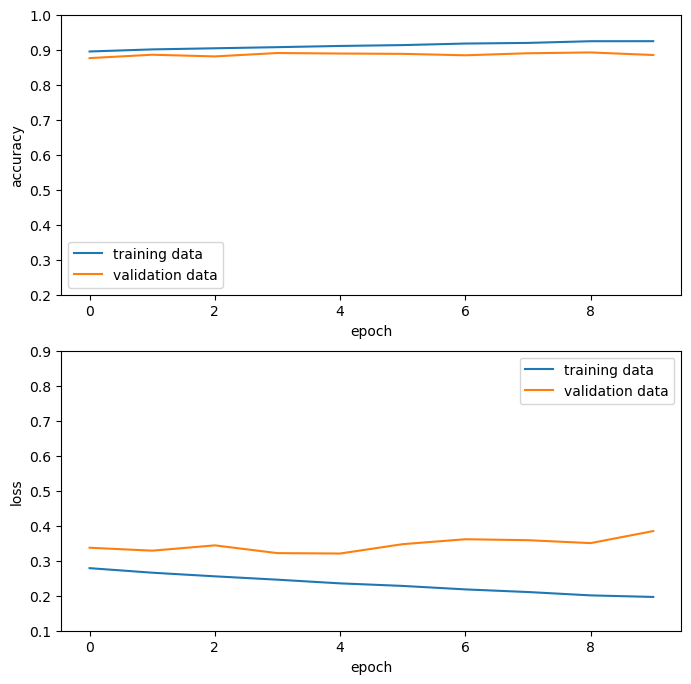

In [39]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann4.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [40]:
ann4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 810,656 (3.09 MB)

 Trainable params: 270,218 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 540,438 (2.06 MB)

### Model 5: one input and hidden layer and batch size of 32

In [41]:
#model defined with adam optimizer by using learning rate with a batch size of 32

ann5 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann5.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#by fitting the model with batch size defined as 32

ann5.fit(X_train, Y_train, epochs=5, batch_size=32)



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7744 - loss: 0.6508
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8572 - loss: 0.3949
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.8729 - loss: 0.3453
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.8844 - loss: 0.3189
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.8934 - loss: 0.2953


In [42]:
ann5.evaluate(X_valid, Y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8806 - loss: 0.3400


[0.33469635248184204, 0.8827000260353088]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8953 - loss: 0.2820 - val_accuracy: 0.8822 - val_loss: 0.3340
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.8992 - loss: 0.2707 - val_accuracy: 0.8630 - val_loss: 0.3758
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.9031 - loss: 0.2613 - val_accuracy: 0.8785 - val_loss: 0.3449
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9070 - loss: 0.2495 - val_accuracy: 0.8867 - val_loss: 0.3312
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.9125 - loss: 0.2378 - val_accuracy: 0.8850 - val_loss: 0.3261
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.9166 - loss: 0.2261 - val_accuracy: 0.8843 - val_loss: 0.3324
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.9179 - loss: 0.2178 - val_accuracy: 0.8897 - val_loss: 0.3161
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.9192 - l

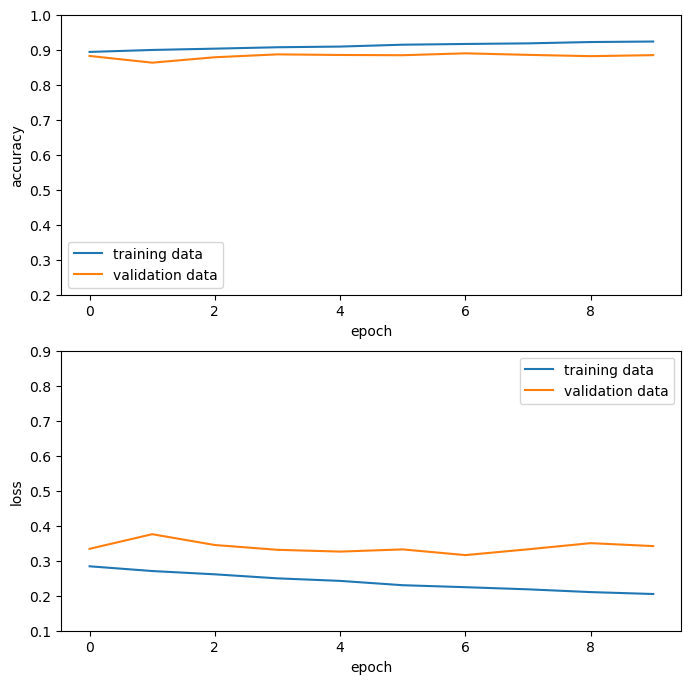

In [43]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann5.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### Model 6 : One input, hidden layer, adam optimizer by using learning rate and batch size of 64 

In [44]:
#model definition with adam optimizer by using learning rate with a batch size of 64
ann6 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann6.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#by fitting the model with batch size defined as 64

ann6.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7637 - loss: 0.6885
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8562 - loss: 0.4046
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.8714 - loss: 0.3594
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.8821 - loss: 0.3273
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.8875 - loss: 0.3095


In [45]:
ann6.evaluate(X_valid, Y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8750 - loss: 0.3566


[0.3532045781612396, 0.8761000037193298]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.8843 - loss: 0.3202 - val_accuracy: 0.8777 - val_loss: 0.3454
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.8920 - loss: 0.2950 - val_accuracy: 0.8617 - val_loss: 0.3701
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.8985 - loss: 0.2726 - val_accuracy: 0.8835 - val_loss: 0.3185
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9006 - loss: 0.2635 - val_accuracy: 0.8814 - val_loss: 0.3405
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.9047 - loss: 0.2548 - val_accuracy: 0.8873 - val_loss: 0.3175
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.9085 - loss: 0.2475 - val_accuracy: 0.8814 - val_loss: 0.3293
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9121 - loss: 0.2350 - val_accuracy: 0.8799 - val_loss: 0.3414
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.9165 -

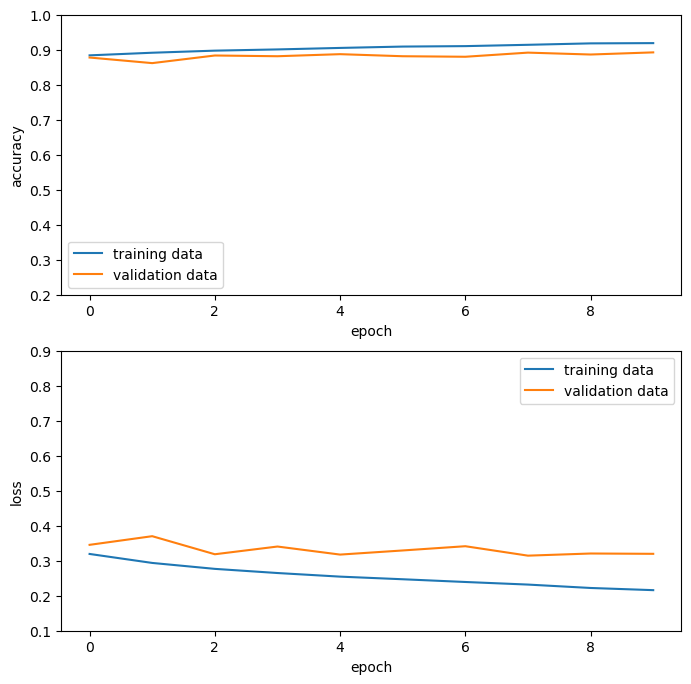

In [46]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann6.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### Model 7: One input and three hidden layers with a SGD optimizer

In [47]:
#created model using sgd optimizer 


ann7 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation='softmax')
])

ann7.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


ann7.fit(X_train,Y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6243 - loss: 1.1558
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8159 - loss: 0.5208
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8415 - loss: 0.4474
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4192
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.3966


In [48]:
ann7.evaluate(X_valid, Y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8563 - loss: 0.4033


[0.39833971858024597, 0.8590999841690063]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8629 - loss: 0.3869 - val_accuracy: 0.8559 - val_loss: 0.4045
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8673 - loss: 0.3705 - val_accuracy: 0.8607 - val_loss: 0.3858
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8737 - loss: 0.3523 - val_accuracy: 0.8646 - val_loss: 0.3760
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.3377 - val_accuracy: 0.8705 - val_loss: 0.3598
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8809 - loss: 0.3295 - val_accuracy: 0.8589 - val_loss: 0.3809
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8821 - loss: 0.3225 - val_accuracy: 0.8661 - val_loss: 0.3781
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8853 - loss: 0.3162 - val_accuracy: 0.8583 - val_loss: 0.3885
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8896 - loss: 0.3068 - 

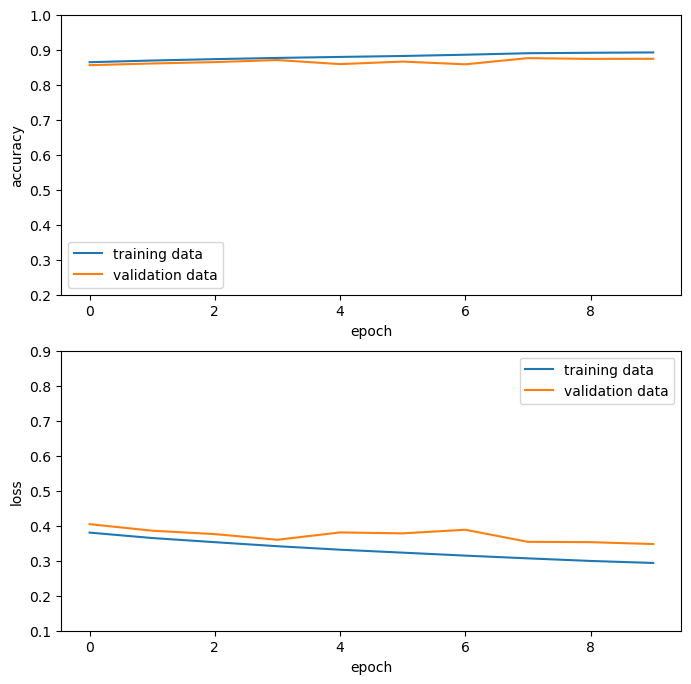

In [49]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann7.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### Model 8 : One input and two hidden layers with L1 regularization 

In [50]:
from tensorflow.keras import regularizers

# Defined the model with L1 regularization
ann8 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
ann8.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
ann8.fit(X_train, Y_train, epochs=5, batch_size=32)




Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step - accuracy: 0.7353 - loss: 1.8783
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8125 - loss: 0.8555
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8213 - loss: 0.7397
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8292 - loss: 0.6897
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8342 - loss: 0.6622


In [52]:
ann8.evaluate(X_valid, Y_valid)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8376 - loss: 0.6403


[0.635217010974884, 0.8400999903678894]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.8368 - loss: 0.6398 - val_accuracy: 0.8312 - val_loss: 0.6449
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.8407 - loss: 0.6260 - val_accuracy: 0.8142 - val_loss: 0.6793
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.8412 - loss: 0.6150 - val_accuracy: 0.8409 - val_loss: 0.6119
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8413 - loss: 0.6063 - val_accuracy: 0.8372 - val_loss: 0.6021
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.8396 - loss: 0.6064 - val_accuracy: 0.8345 - val_loss: 0.6191
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.8440 - loss: 0.6011 - val_accuracy: 0.8393 - val_loss: 0.5993
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.8404 - loss: 0.5953 - val_accuracy: 0.8241 - val_loss: 0.6625
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8453 -

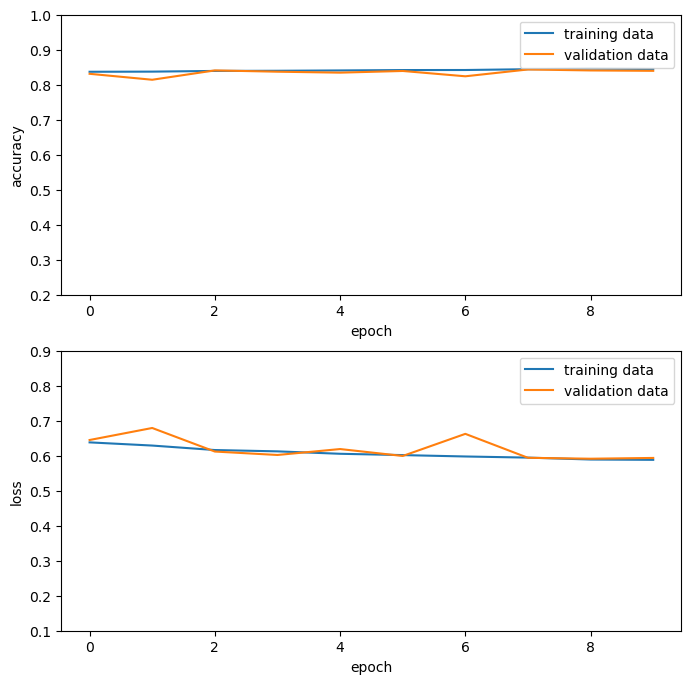

In [53]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann8.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### Model 9 : One input and two hidden layers with L2 regularization 

In [51]:
# Defined the model architecture with L2 regularization
ann9 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
ann9.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
ann9.fit(X_train, Y_train, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step - accuracy: 0.7552 - loss: 0.8593
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.8481 - loss: 0.5313
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8562 - loss: 0.4909
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.8631 - loss: 0.4631
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.8692 - loss: 0.4447


In [54]:
ann9.evaluate(X_valid, Y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8562 - loss: 0.4786


[0.472456157207489, 0.859000027179718]

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.8692 - loss: 0.4332 - val_accuracy: 0.8582 - val_loss: 0.4642
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8732 - loss: 0.4278 - val_accuracy: 0.8379 - val_loss: 0.5002
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.8762 - loss: 0.4165 - val_accuracy: 0.8730 - val_loss: 0.4317
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.8762 - loss: 0.4100 - val_accuracy: 0.8661 - val_loss: 0.4511
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8785 - loss: 0.4065 - val_accuracy: 0.8599 - val_loss: 0.4518
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.8800 - loss: 0.4081 - val_accuracy: 0.8680 - val_loss: 0.4412
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.8821 - loss: 0.3970 - val_accuracy: 0.8695 - val_loss: 0.4332
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.8818 -

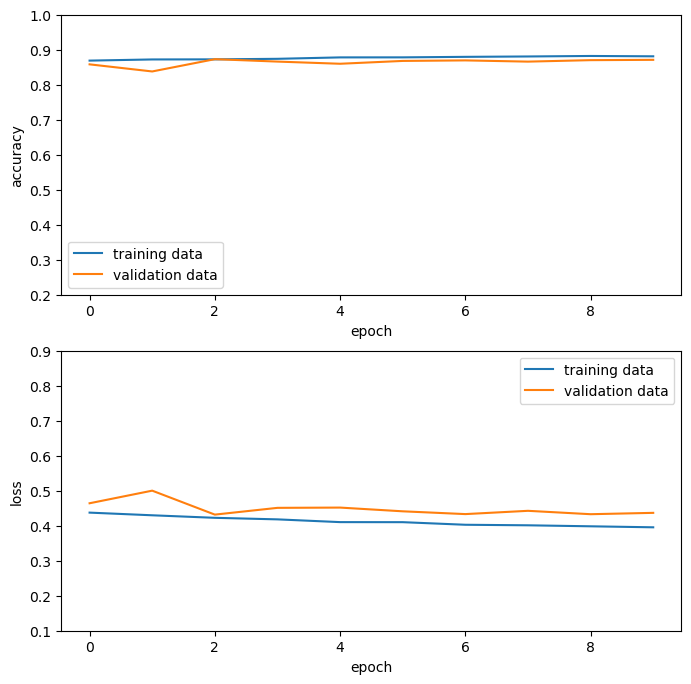

In [55]:
# Plotting the graphs of accuracy and loss , between training and validation
info = ann9.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### Model 10: one input and two hidden layers with intial weights and bias 

In [56]:
# created model using weight and bias intialization
from tensorflow.keras.initializers import glorot_uniform

ann10 = models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation="relu", kernel_initializer=glorot_uniform(seed=10)),   
  layers.Dense(256, activation="relu", kernel_initializer=glorot_uniform(seed=20)),
  layers.Dense(10, activation="softmax")
])
# Compile the model
ann10.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
ann10.fit(X_train, Y_train, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7711 - loss: 0.6425
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8637 - loss: 0.3739
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8778 - loss: 0.3303
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.3023
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8942 - loss: 0.2854


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8988 - loss: 0.2667 - val_accuracy: 0.8820 - val_loss: 0.3311
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9030 - loss: 0.2564 - val_accuracy: 0.8780 - val_loss: 0.3407
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9071 - loss: 0.2476 - val_accuracy: 0.8838 - val_loss: 0.3225
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9111 - loss: 0.2367 - val_accuracy: 0.8822 - val_loss: 0.3372
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9154 - loss: 0.2233 - val_accuracy: 0.8852 - val_loss: 0.3299
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9181 - loss: 0.2139 - val_accuracy: 0.8811 - val_loss: 0.3492
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9235 - loss: 0.2016 - val_accuracy: 0.8911 - val_loss: 0.3367
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9253 - loss: 0.1972 - 

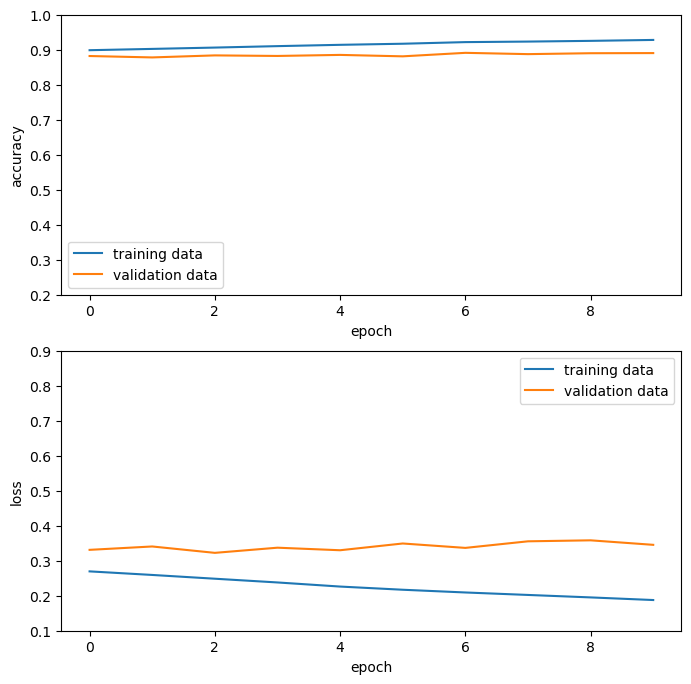

In [57]:
# Plotting the graphs of accuracy and loss ,between training and validation
info = ann10.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.2,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,0.9])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [58]:
ann10.evaluate(X_test, Y_test)
y_pred = ann8.predict(X_test)
y_pred[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8831 - loss: 0.3708
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


array([4.0019233e-05, 1.9245630e-04, 8.1399477e-05, 1.3435808e-04,
       6.2125211e-05, 9.1358230e-02, 6.5226421e-05, 2.0028383e-01,
       3.9717499e-03, 7.0381051e-01], dtype=float32)

In [59]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [60]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(Y_test, Y_pred_labels)
cm

array([[850,   3,  14,  58,  10,   0,  53,   0,  12,   0],
       [  3, 956,   4,  28,   5,   0,   2,   0,   2,   0],
       [ 24,   5, 712,  13, 192,   1,  41,   0,  12,   0],
       [ 30,  13,  12, 874,  44,   0,  22,   0,   5,   0],
       [  0,   1,  70,  35, 850,   0,  36,   0,   8,   0],
       [  0,   0,   0,   1,   0, 924,   0,  44,   3,  28],
       [183,   3, 131,  47, 212,   0, 399,   0,  25,   0],
       [  0,   0,   0,   0,   0,  34,   0, 935,   1,  30],
       [  8,   1,   7,   9,   6,   4,   6,   4, 955,   0],
       [  0,   0,   0,   0,   0,  10,   0,  41,   1, 948]])

In [61]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.75      0.71      0.73      1000
           3       0.82      0.87      0.85      1000
           4       0.64      0.85      0.73      1000
           5       0.95      0.92      0.94      1000
           6       0.71      0.40      0.51      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



## Observation / Conclusion :

We have observed all the models have an accuracy with in the range of 83-89 , 
So far below are the combinations we have took :
- model 1 : one input flat layer of 784 with adam optimizer has an accuracy of 84.03
- model 2 : one input , one hidden layer has an accuracy of 87.13
- model 3 : one input and one hidden layer with drop out and batch normalization has accuracy of 86.61
- model 4 : one input and three hidden layers has accuracy of 88.20
- model 5 : one input and hidden layer and batch size of 32 accuracy of 88.27
- model 6 : one input and hidden layer and batch size of 64 accuracy of 87.61
- model 7 : one input and three hidden layers with a SGD optimizer has accuracy of 84.90
- model 8 : one input and two hidden layers with L1 regularization has accuracy of 84.00
- model 9 : one input and two hidden layers with L2 regularization has accuracy of 85.90
- model 10: one input and two hidden layers with intial weights and bias has accuracy of 88.31



